<a href="https://colab.research.google.com/github/TRANTHITHUYTIEN20104061/Tr-n-Th-Th-y-Ti-n-20104061/blob/main/nh%E1%BA%ADn_di%E1%BB%87n_g%E1%BA%A1o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import matplotlib.pyplot as plt
%matplotlib inline
import pathlib 
from glob import glob
from tensorflow.keras.utils import image_dataset_from_directory
import warnings

In [ ]:
import os

labels = os.listdir("/content/drive/MyDrive/Colab Notebooks/BTND/gạo")
labels

['Cốm',
 'gạo hạt dài',
 'hạt tròn',
 'gạo lài',
 'tấm',
 'gao lứt',
 'gạo tẻ']

In [ ]:
com_data = plt.imread('/content/drive/MyDrive/Colab Notebooks/BTND/gạo/Cốm/images (10).jpg')
com_data
com_data.shape

(225, 225, 3)

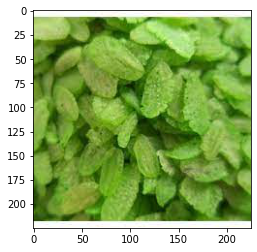

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread('/content/drive/MyDrive/Colab Notebooks/BTND/gạo/Cốm/images (10).jpg'))

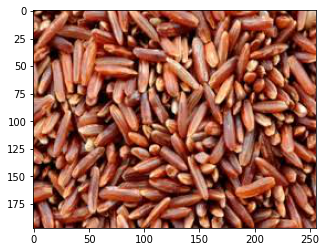

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread('/content/drive/MyDrive/Colab Notebooks/BTND/gạo/gao lứt/images (1).jpg'))


In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/BTND/gạo'
data_dir = pathlib.Path(path)
data_dir

PosixPath('/content/drive/MyDrive/Colab Notebooks/BTND/gạo')

In [ ]:
import cv2
def read_image(path):
    image = cv2.imread(path, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image
path

'/content/drive/MyDrive/Colab Notebooks/BTND/gạo'

In [ ]:
labels = ['Cốm', 'gao lứt', 'gạo hạt dài', 'gạo lài', 'hạt tròn','gạo tẻ','tấm']
col_to_title = {'Cốm': 'Cốm', 'gao lứt': 'gao lứt', 'gạo hạt dài': 'gạo hạt dài', 'gạo lài': 'gạo lài','hạt tròn': 'hạt tròn','gạo tẻ':'gạo tẻ','tấm':'tấm'}

In [ ]:
gao_folder = '/content/drive/MyDrive/Colab Notebooks/BTND/gạo'
gao_folder

'/content/drive/MyDrive/Colab Notebooks/BTND/gạo'

In [ ]:
x_train = image_dataset_from_directory(gao_folder,validation_split=0.3,subset="validation",seed=2210,image_size=(128,128),batch_size=32)
x_test = image_dataset_from_directory(gao_folder,validation_split=0.3,subset="validation",seed=2210,image_size=(128,128),batch_size=32)

Found 293 files belonging to 7 classes.
Using 87 files for validation.
Found 293 files belonging to 7 classes.
Using 87 files for validation.


In [ ]:
class_name=x_train.class_names
class_name

['Cốm',
 'gao lứt',
 'gạo hạt dài',
 'gạo lài',
 'gạo tẻ',
 'hạt tròn',
 'tấm']

In [ ]:
import tensorflow as tf 
AUTOTUNE = tf.data.AUTOTUNE
x_train = x_train.cache().shuffle(buffer_size=1000).prefetch(buffer_size=AUTOTUNE)
x_test = x_test.cache().shuffle(buffer_size=1000).prefetch(buffer_size=AUTOTUNE)

In [ ]:
data_layer=Sequential([layers.RandomFlip(mode='horizontal',input_shape=(128,128,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1)],name='data_layer')
num_classes=len(class_name)
num_classes

7

In [ ]:
model=Sequential([ data_layer,
    layers.Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu"),
    layers.MaxPooling2D(),
    
    layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    
    layers.Dropout(rate=0.2),
    layers.Flatten(),
    
    layers.Dense(units=128, activation="relu"),
    layers.Dense(units=num_classes)])

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 data_layer (Sequential)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 64)       

In [ ]:
history = model.fit(x = x_train, epochs = 100, validation_data = x_test)

Epoch 1/100


3/3 [==============================] - 16s 882ms/step - loss: 48.9928 - accuracy: 0.2299 - val_loss: 24.2358 - val_accuracy: 0.4138
Epoch 2/100
3/3 [==============================] - 3s 885ms/step - loss: 15.7754 - accuracy: 0.4023 - val_loss: 2.1996 - val_accuracy: 0.7011
Epoch 3/100
3/3 [==============================] - 2s 784ms/step - loss: 1.9663 - accuracy: 0.6667 - val_loss: 1.2330 - val_accuracy: 0.7356
Epoch 4/100
3/3 [==============================] - 2s 786ms/step - loss: 1.0054 - accuracy: 0.7816 - val_loss: 1.7682 - val_accuracy: 0.6667
Epoch 5/100
3/3 [==============================] - 2s 779ms/step - loss: 1.2848 - accuracy: 0.6552 - val_loss: 0.7803 - val_accuracy: 0.7816
Epoch 6/100
3/3 [==============================] - 2s 798ms/step - loss: 0.6077 - accuracy: 0.7701 - val_loss: 0.5609 - val_accuracy: 0.8046
Epoch 7/100
3/3 [==============================] - 2s 821ms/step - loss: 0.7591 - accuracy: 0.7356 - val_loss: 0.3690 - val_accuracy: 0.8621
Epoch 8/100
3/3 [====

In [ ]:
model.save("Nhan_dien_gao.h5")

1/1 [==============================] - 0s 23ms/step


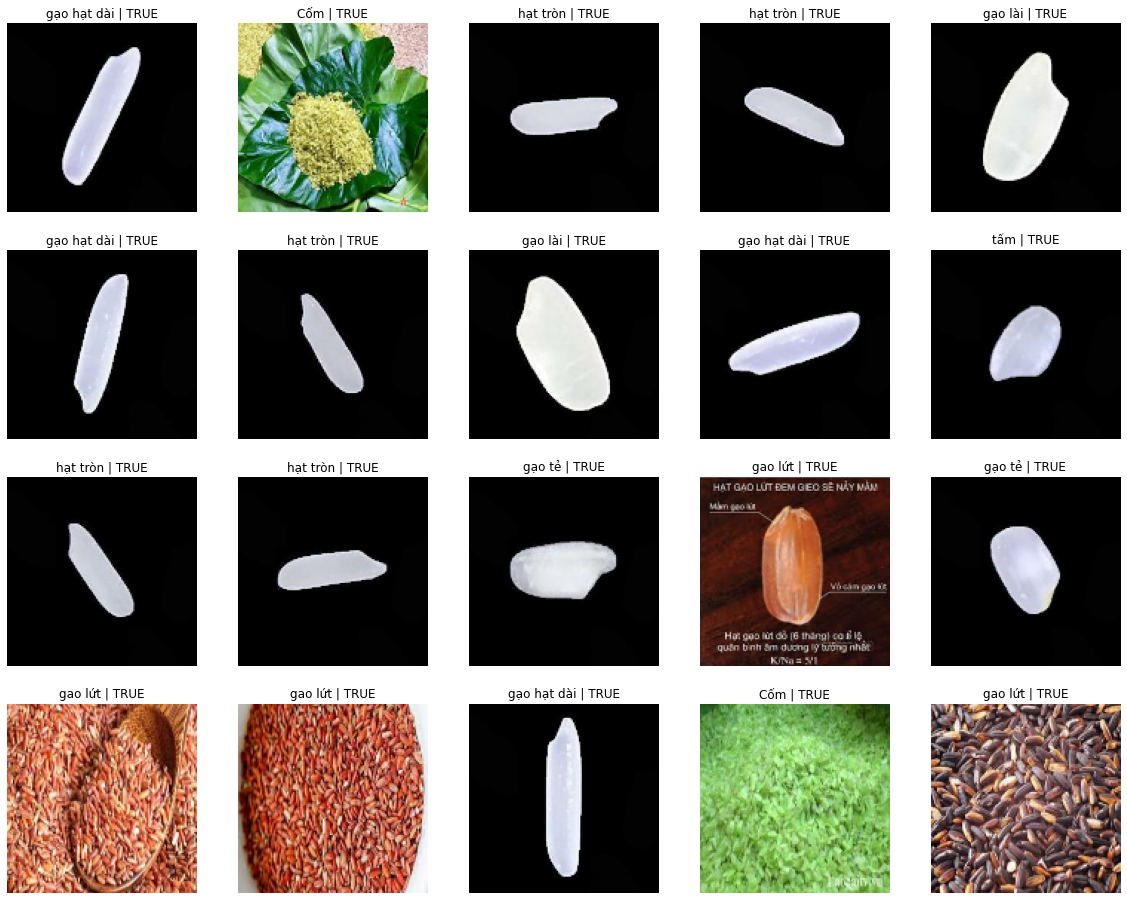

In [ ]:
plt.figure(figsize=(20, 16))
class_names = ['Cốm', 'gao lứt', 'gạo hạt dài', 'gạo lài', 'hạt tròn','gạo tẻ','tấm']
for images, labels in x_test.take(1):
    for i in range(20):
        ax = plt.subplot(4, 5, i + 1)
        img = images[i].numpy().astype("uint8")
        img = tf.expand_dims(img, axis=0)
        
        predictions = model.predict(img)
        predicted_class = np.argmax(predictions)
        if class_names[predicted_class] == class_names[labels[i]]:
            result = ' | TRUE'   
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[predicted_class]+result  )
        plt.axis("off")